In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print('data set shape:-',df.shape) # in this data set 11 columns belongs to features and one column (quality) belongs to target.

data set shape:- (1599, 12)


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum() # there is no null value present in this data set.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

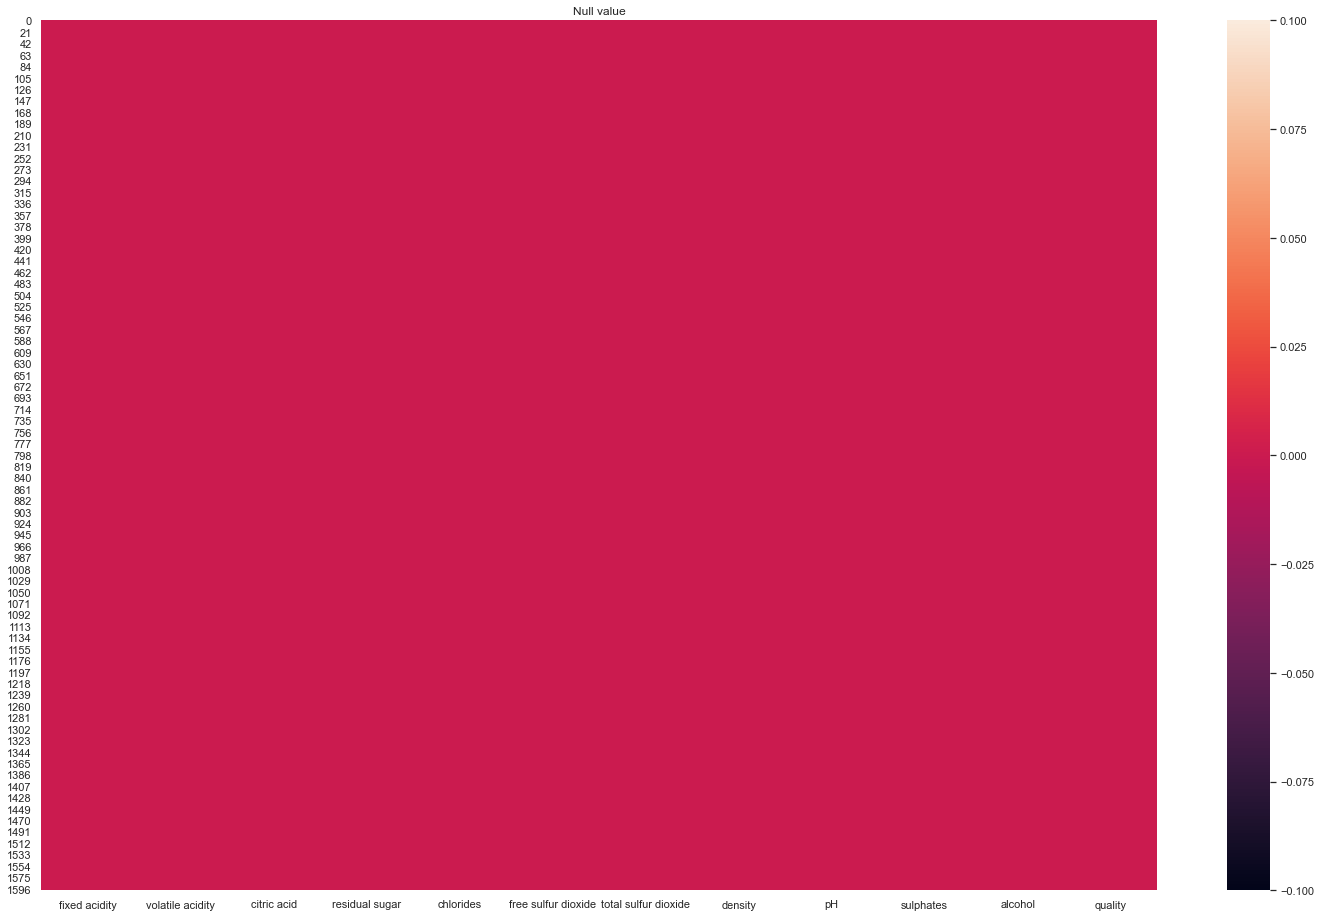

In [9]:
plt.figure(figsize=[25,16])
sns.heatmap(df.isnull())
plt.title('Null value')
plt.show()

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


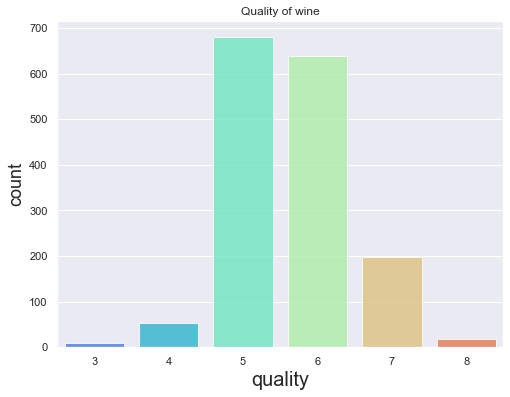

In [11]:
count=df['quality'].value_counts()
plt.figure(figsize=[8,6])
sns.barplot(count.index,count.values,alpha=0.8,palette='rainbow')
plt.xlabel('quality',fontsize=20)
plt.ylabel('count',fontsize=18)
plt.title('Quality of wine')
plt.show()

# corelation 

In [12]:
corr_matrix=df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


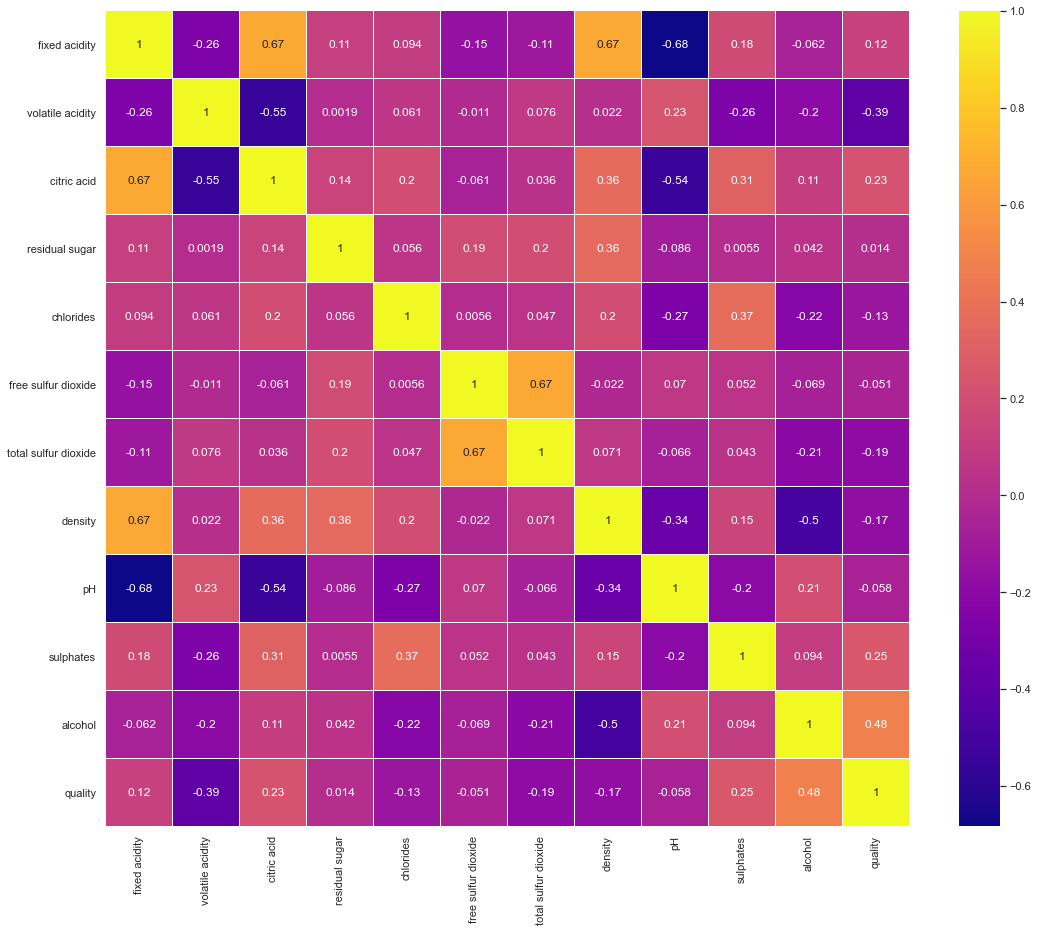

In [13]:
plt.figure(figsize=[18,15])
sns.heatmap(corr_matrix,annot=True,linewidths=0.1,cmap='plasma')
plt.show()

In [14]:
corr_matrix=df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

# outlier removel using boxplot and IQR

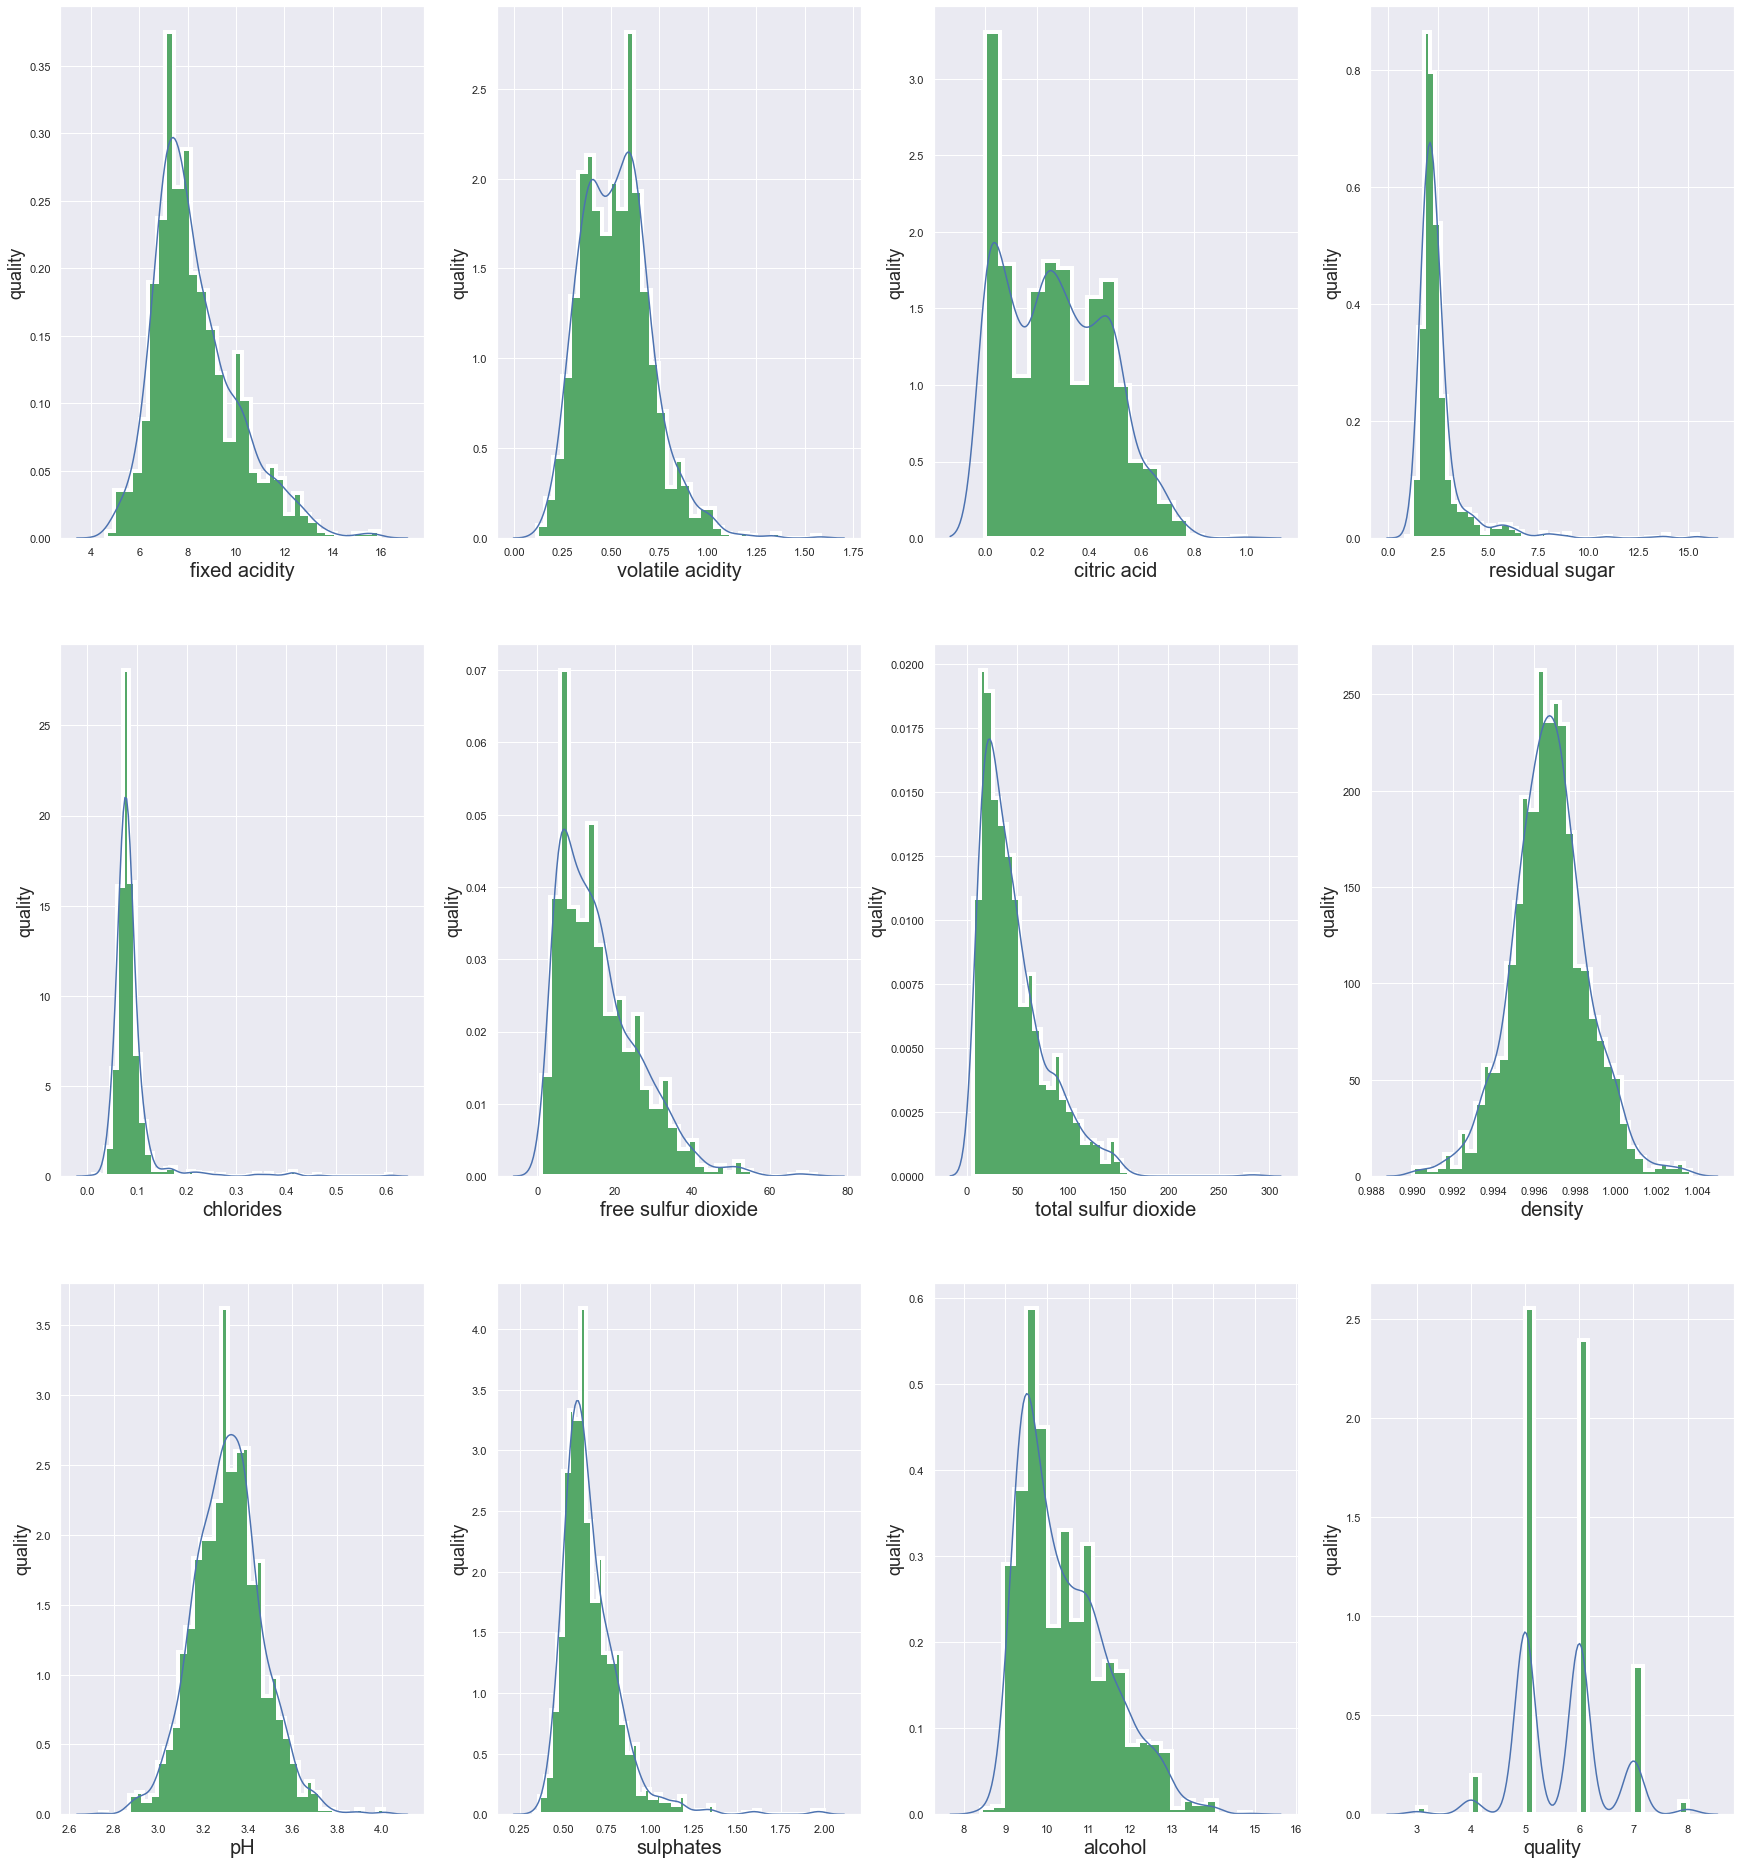

In [15]:
plt.figure(figsize=[30,45])
plotnumber=1

for column in df.columns:

    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
    
    
        sns.distplot(df[column], hist_kws={"histtype": "stepfilled", "linewidth": 4,"alpha": 1, "color": "g"})
                               
        plt.xlabel(column,fontsize=20)
        plt.ylabel('quality',fontsize=18)
    plotnumber+=1    
plt.show()

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

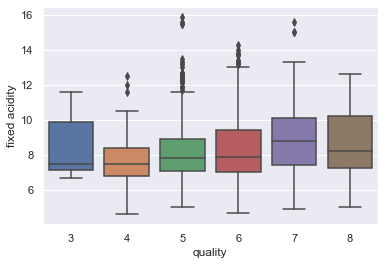

In [16]:
sns.boxplot('quality', 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

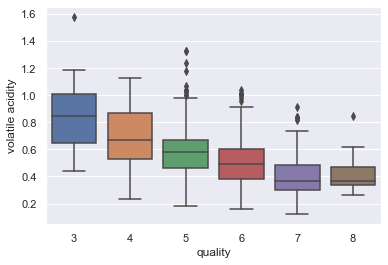

In [17]:
sns.boxplot('quality', 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

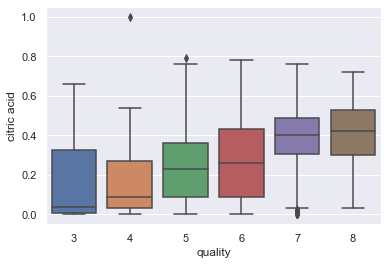

In [18]:
sns.boxplot('quality', 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

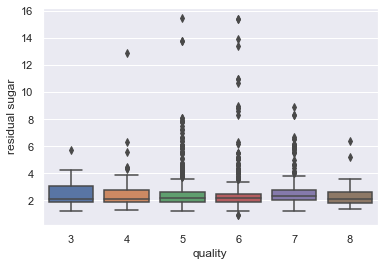

In [19]:
sns.boxplot('quality', 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

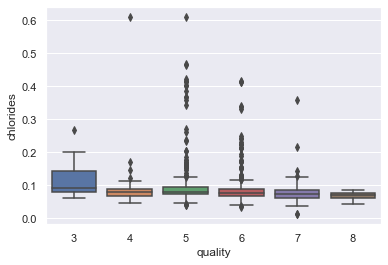

In [20]:
sns.boxplot('quality', 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

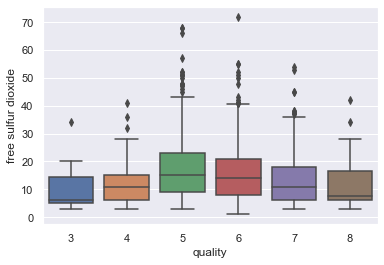

In [21]:
sns.boxplot('quality', 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

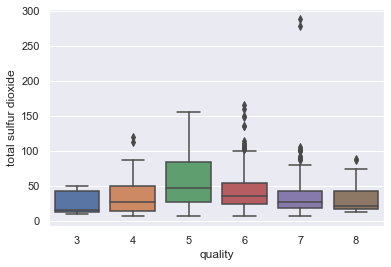

In [22]:
sns.boxplot('quality', 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

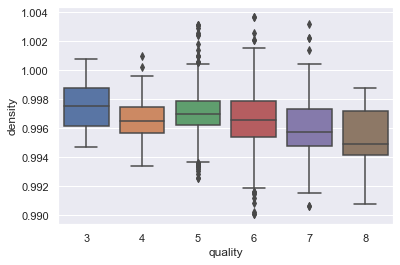

In [23]:
sns.boxplot('quality', 'density', data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

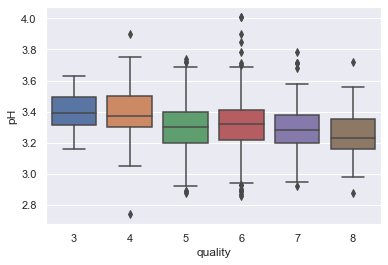

In [24]:
sns.boxplot('quality', 'pH', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

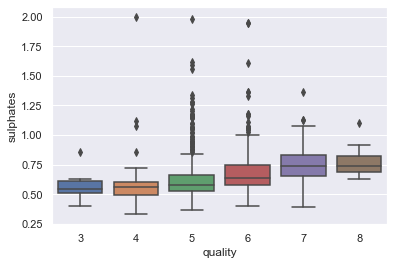

In [25]:
sns.boxplot('quality', 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

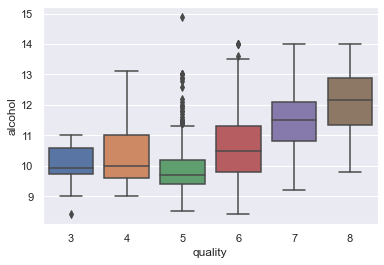

In [26]:
sns.boxplot('quality', 'alcohol', data = df)

In [27]:
q1=df.quantile(0.25)

q3=df.quantile(0.75)

print(q1,"\n\n\n",q3)

iqr=q3-q1




fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 0.25, dtype: float64 


 fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64


In [28]:
upper_limit=(q3+1.5*iqr)

lower_limit=(q1-1.5*iqr)

print(upper_limit,"\n\n",lower_limit)

fixed acidity            12.350000
volatile acidity          1.015000
citric acid               0.915000
residual sugar            3.650000
chlorides                 0.120000
free sulfur dioxide      42.000000
total sulfur dioxide    122.000000
density                   1.001187
pH                        3.685000
sulphates                 1.000000
alcohol                  13.500000
quality                   7.500000
dtype: float64 

 fixed acidity            3.950000
volatile acidity         0.015000
citric acid             -0.405000
residual sugar           0.850000
chlorides                0.040000
free sulfur dioxide    -14.000000
total sulfur dioxide   -38.000000
density                  0.992248
pH                       2.925000
sulphates                0.280000
alcohol                  7.100000
quality                  3.500000
dtype: float64


In [29]:
#index=np.where(df['fixed acidity']<3.950000)
#index

index=np.where(df['fixed acidity']> 12.350000) ##UPPER SIDE OUTLIER REMOVE
index

(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
         359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
         442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
         555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
         652,  680,  811,  814, 1224], dtype=int64),)

In [30]:
df=df.drop(df.index[index])

In [31]:
df.shape

(1550, 12)

In [32]:
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
#index=np.where(df['volatile acidity']< 0.015000)
#index

index=np.where(df['volatile acidity']> 1.015000)   ##UPPER SIDE OUTLIER REMOVE

index

df=df.drop(df.index[index])
df.shape
df.reset_index()


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [34]:
#index=np.where(df['citric acid']< -0.405000)
#index

index=np.where(df['citric acid']> 0.915000)    ##UPPER SIDE OUTLIER REMOVE

index

df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1526,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1527,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1528,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
index=np.where(df['residual sugar']> 3.650000)    ##UPPER SIDE OUTLIER REMOVE

index

df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1388,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1389,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1390,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [36]:
index=np.where(df['chlorides']<  0.040000)    #LOWER SIDE OUTLIER REMOVE

index



(array([ 180,  571,  577,  673,  709,  710,  734, 1292, 1367], dtype=int64),)

In [37]:
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1379,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1380,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1381,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [38]:
index=np.where(df['free sulfur dioxide']>42.000000)   ##UPPER SIDE OUTLIER REMOVE

index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1363,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1364,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1365,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [39]:
#index=np.where(df['total sulfur dioxide']< -38.000000)  

#index
#df=df.drop(df.index[index])
##df.shape
#df.reset_index()

In [40]:
index=np.where(df['density']< 0.992248)    #LOWER SIDE OUTLIER REMOVE

index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1346,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1347,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1348,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [41]:
index=np.where(df['pH']>3.685000 )   ##UPPER SIDE OUTLIER REMOVE

index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1331,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1332,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1333,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [42]:
index=np.where(df['sulphates']<0.280000)    #LOWER SIDE OUTLIER REMOVE

index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1331,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1332,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1333,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [43]:
index=np.where(df['alcohol']>13.500000)   ##UPPER SIDE OUTLIER REMOVE

index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1329,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1330,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1331,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# model buliding

In [44]:
x=df.drop(['quality'],axis=1)
y=df['quality']

print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [45]:
df['quality'].value_counts()

5    587
6    542
7    149
4     36
8     13
3      6
Name: quality, dtype: int64

In [46]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#3,4 --> Bad
#5,6 --> Average
#7,8 --> Excellent
#Create an empty list called Reviews


reviews=[]

reviews = []
for i in df['quality']:
    
    if i >= 3 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 6:
        reviews.append('2')
    elif i >= 7 and i <= 8:
        reviews.append('3')
df['Reviews'] = reviews

In [47]:
df['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [48]:
df['Reviews'].value_counts()

2    1129
3     162
1      42
Name: Reviews, dtype: int64

In [49]:
df.drop(['quality'],axis=1,inplace=True)

In [50]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [51]:
x=df.drop(['Reviews'],axis=1)
y=df['Reviews']

# scaled

In [52]:
scale=StandardScaler()
x_new=scale.fit_transform(x)
x_new

array([[-0.56568299,  1.06721698, -1.41406291, ...,  1.43390891,
        -0.57045191, -0.95421362],
       [-0.29385335,  2.15439317, -1.41406291, ..., -0.80088848,
         0.14405351, -0.54397896],
       [-0.29385335,  1.42960905, -1.19717186, ..., -0.36834705,
        -0.03457284, -0.54397896],
       ...,
       [-1.3132145 , -0.08035788, -0.70916701, ...,  0.78509677,
         0.56084834,  0.68672503],
       [-1.58504414,  0.73502426, -0.76338977, ...,  1.86645034,
         0.32267987, -0.1337443 ],
       [-1.51708673, -1.28833142,  1.13440688, ...,  0.56882605,
         0.02496928,  0.68672503]])

# model

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=340)

In [60]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predrf))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predrf))
print("classification report:-\n\n",classification_report(y_test,predrf))

accuracy score:-
 0.8952095808383234
confusion matrix:-
 [[  0  10   0]
 [  0 279   6]
 [  0  19  20]]
classification report:-

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.91      0.98      0.94       285
           3       0.77      0.51      0.62        39

    accuracy                           0.90       334
   macro avg       0.56      0.50      0.52       334
weighted avg       0.86      0.90      0.87       334



In [55]:
# using GridsearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [5,10, 15, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 40,50,60,70,80]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [56]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]},
             verbose=2)

In [57]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 20}

In [58]:
rf_gridsearchcv=RandomForestClassifier(criterion='gini',bootstrap=True,max_depth=20,max_features=2,min_samples_leaf=4,min_samples_split=10,n_estimators=30)
rf_gridsearchcv.fit(x_train,y_train)
predrf=rf_gridsearchcv.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predrf))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predrf))
print("classification report:-\n\n",classification_report(y_test,predrf))

accuracy score:-
 0.8802395209580839
confusion matrix:-
 [[  0  10   0]
 [  0 281   4]
 [  0  26  13]]
classification report:-

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.89      0.99      0.93       285
           3       0.76      0.33      0.46        39

    accuracy                           0.88       334
   macro avg       0.55      0.44      0.47       334
weighted avg       0.85      0.88      0.85       334



In [61]:
predrf=rf.predict(x_test)

print('this is predicted values:-\n',predrf[:200])
print('this is test values:-\n',y_test[:200].values)

this is predicted values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '3' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '3' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '3' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '3' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2']
this is test values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2

In [62]:
predrf=rf_gridsearchcv.predict(x_test)

print('this is predicted values:-\n',predrf[:200])
print('this is test values:-\n',y_test[:200].values)

this is predicted values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2']
this is test values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2

In [63]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,pred_dt))
print('confusion matrix:-\n' ,confusion_matrix(y_test,pred_dt))
print("classification report:-\n\n",classification_report(y_test,pred_dt))

accuracy score:-
 0.8413173652694611
confusion matrix:-
 [[  1   9   0]
 [  8 258  19]
 [  1  16  22]]
classification report:-

               precision    recall  f1-score   support

           1       0.10      0.10      0.10        10
           2       0.91      0.91      0.91       285
           3       0.54      0.56      0.55        39

    accuracy                           0.84       334
   macro avg       0.52      0.52      0.52       334
weighted avg       0.84      0.84      0.84       334



In [64]:
param_grid={
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[5,10,15,20],
     'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'max_leaf_nodes':[2,4,6,8,10]
        
}


grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3)

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20], 'max_features': [2, 3],
                         'max_leaf_nodes': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'splitter': ['best', 'random']})

In [66]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 3,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'splitter': 'best'}

In [68]:
dt_gridsearchcv=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features=3,max_leaf_nodes=6,min_samples_leaf=5,min_samples_split=8,splitter='best')
dt_gridsearchcv.fit(x_train,y_train)
pred_dt=dt_gridsearchcv.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,pred_dt))
print('confusion matrix:-\n' ,confusion_matrix(y_test,pred_dt))
print("classification report:-\n\n",classification_report(y_test,pred_dt))

accuracy score:-
 0.8712574850299402
confusion matrix:-
 [[  0  10   0]
 [  0 283   2]
 [  0  31   8]]
classification report:-

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.87      0.99      0.93       285
           3       0.80      0.21      0.33        39

    accuracy                           0.87       334
   macro avg       0.56      0.40      0.42       334
weighted avg       0.84      0.87      0.83       334



In [69]:
preddt=dt.predict(x_test)

print('this is predicted values:-\n',preddt[:200])
print('this is test values:-\n',y_test[:200].values)

this is predicted values:-
 ['2' '2' '2' '2' '2' '1' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2'
 '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '1'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '3' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '3' '2' '3' '2' '2' '3' '2' '1' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2'
 '2' '2' '1' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2'
 '2' '1' '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '3' '2' '2'
 '2' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2']
this is test values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2

In [70]:
preddt=dt_gridsearchcv.predict(x_test)

print('this is predicted values:-\n',preddt[:200])
print('this is test values:-\n',y_test[:200].values)

this is predicted values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2']
this is test values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2

In [71]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predknn))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predknn))
print("classification report:-\n\n",classification_report(y_test,predknn))


accuracy score:-
 0.8622754491017964
confusion matrix:-
 [[  0  10   0]
 [  0 271  14]
 [  0  22  17]]
classification report:-

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.89      0.95      0.92       285
           3       0.55      0.44      0.49        39

    accuracy                           0.86       334
   macro avg       0.48      0.46      0.47       334
weighted avg       0.83      0.86      0.84       334



In [72]:
param_grid={ 
    'n_neighbors':[3,5,7,9,11],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'weights':['uniform','distance'],
    'leaf_size':[10,20,30,40,50],
    
}
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3)

In [73]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [74]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 11,
 'weights': 'distance'}

In [75]:
knn_gridsearchcv=KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=11,weights='distance')
knn_gridsearchcv.fit(x_train,y_train)
predknn=knn_gridsearchcv.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predknn))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predknn))
print("classification report:-\n\n",classification_report(y_test,predknn))

accuracy score:-
 0.8952095808383234
confusion matrix:-
 [[  0  10   0]
 [  0 276   9]
 [  0  16  23]]
classification report:-

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.91      0.97      0.94       285
           3       0.72      0.59      0.65        39

    accuracy                           0.90       334
   macro avg       0.54      0.52      0.53       334
weighted avg       0.86      0.90      0.88       334



In [76]:
predknn=knn.predict(x_test)

print('this is predicted values:-\n',predknn[:200])
print('this is test values:-\n',y_test[:200].values)

this is predicted values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2'
 '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '3' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '3' '2' '2' '2' '2' '2' '2'
 '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '3' '2' '3' '2' '2' '2'
 '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2']
this is test values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2

In [77]:
predknn=knn_gridsearchcv.predict(x_test)

print('this is predicted values:-\n',predknn[:200])
print('this is test values:-\n',y_test[:200].values)

this is predicted values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '3' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '3' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '3' '2' '2' '2' '3' '2'
 '2' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '3' '2' '2'
 '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2']
this is test values:-
 ['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '2' '3' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2

In [78]:
svm=SVC()   
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predsvm))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predsvm))
print('classification report:-\n\n',classification_report(y_test,predsvm))

accuracy score:-
 0.8832335329341318
confusion matrix:-
 [[  0  10   0]
 [  0 283   2]
 [  0  27  12]]
classification report:-

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.88      0.99      0.94       285
           3       0.86      0.31      0.45        39

    accuracy                           0.88       334
   macro avg       0.58      0.43      0.46       334
weighted avg       0.85      0.88      0.85       334



In [79]:
param_grid = {'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']}

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = 3)

In [80]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [81]:
grid_search.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [88]:
svm_gridsearchcv=SVC(C=10,gamma=1,kernel='rbf')
svm_gridsearchcv.fit(x_train,y_train)
predsvm=svm_gridsearchcv.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predsvm))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predsvm))
print("classification report:-\n\n",classification_report(y_test,predsvm))

accuracy score:-
 0.8832335329341318
confusion matrix:-
 [[  0  10   0]
 [  0 282   3]
 [  0  26  13]]
classification report:-

               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.89      0.99      0.94       285
           3       0.81      0.33      0.47        39

    accuracy                           0.88       334
   macro avg       0.57      0.44      0.47       334
weighted avg       0.85      0.88      0.85       334



# save the model

In [113]:
import pickle
filename='red wine quality.pkl'
model=[rf,dt,knn,svm]
pickle.dump(model,open(filename,'wb'))

    
   

